# Crop Price Prediction

### Data preprocessing

In [1]:
import pandas as pd
import numpy as np

excel_data = pd.read_excel('./Dataset/Modal price included.xlsx')
dataframe = pd.DataFrame(excel_data)

In [2]:
dataframe.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,BANTWALA,2022-04-01 00:00:00,COCA,AVERAGE,20.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
1,NaN,2022-04-04 00:00:00,COCA,AVERAGE,12.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
2,NaN,2022-04-05 00:00:00,COCA,AVERAGE,17.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
3,NaN,2022-04-06 00:00:00,COCA,AVERAGE,28.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
4,NaN,2022-04-07 00:00:00,COCA,AVERAGE,13.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Market    876 non-null    object 
 1   Date      8451 non-null   object 
 2   Variety   8451 non-null   object 
 3   Grade     8451 non-null   object 
 4   Arrivals  8451 non-null   float64
 5   Unit      8451 non-null   object 
 6   Min       8451 non-null   float64
 7   Max       8451 non-null   float64
 8   Modal     8451 non-null   float64
 9   District  8451 non-null   object 
dtypes: float64(4), object(6)
memory usage: 694.6+ KB


In [4]:
dataframe.isna().sum()

Market      8013
Date         438
Variety      438
Grade        438
Arrivals     438
Unit         438
Min          438
Max          438
Modal        438
District     438
dtype: int64

#### Market coulumn has many NaN vlaues in between, First we fill it by considering the first value in each row

In [5]:
dataframe['Market'] = dataframe['Market'].fillna(method= 'pad')
print('After filling the null values')
dataframe.isna().sum()

After filling the null values


Market        0
Date        438
Variety     438
Grade       438
Arrivals    438
Unit        438
Min         438
Max         438
Modal       438
District    438
dtype: int64

In [6]:
dataframe.tail()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
8884,SULYA,2022-09-12 00:00:00,BLACK PEPPER,AVERAGE,11.0,Quintal,30000.0,49500.0,46300.0,Dakshina Kannada
8885,SULYA,2022-09-19 00:00:00,BLACK PEPPER,AVERAGE,16.0,Quintal,30000.0,49000.0,40000.0,Dakshina Kannada
8886,SULYA,2022-09-28 00:00:00,BLACK PEPPER,AVERAGE,30.0,Quintal,30000.0,49500.0,48700.0,Dakshina Kannada
8887,SULYA,2022-09-30 00:00:00,BLACK PEPPER,AVERAGE,12.0,Quintal,30000.0,49000.0,40000.0,Dakshina Kannada
8888,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### There are some empty rows inbetween we remove it by considering one of the columns NaN value

In [7]:
print('Before removing Null values: ')
dataframe.isna().sum()

Before removing Null values: 


Market        0
Date        438
Variety     438
Grade       438
Arrivals    438
Unit        438
Min         438
Max         438
Modal       438
District    438
dtype: int64

In [8]:
dataframe = dataframe.dropna(subset=['Unit'])

In [9]:
print('After removing Null values: ')
dataframe.isna().sum()

After removing Null values: 


Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64

#### Additional information

In [10]:
dataframe.describe()

,Arrivals,Min,Max,Modal
count,8451.000000,8451.000000,8451.000000,8451.000000
mean,3083.807242,22540.610342,33188.377588,28955.751035
std,21716.029849,10651.062144,11636.051360,10915.411474
min,1.000000,800.000000,1600.000000,1400.000000
25%,16.000000,12500.000000,25000.000000,20000.000000
50%,56.000000,22500.000000,31800.000000,27500.000000
75%,245.000000,28500.000000,43000.000000,37000.000000
max,755975.000000,51250.000000,58000.000000,53000.000000


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8451 entries, 0 to 8887
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Market    8451 non-null   object 
 1   Date      8451 non-null   object 
 2   Variety   8451 non-null   object 
 3   Grade     8451 non-null   object 
 4   Arrivals  8451 non-null   float64
 5   Unit      8451 non-null   object 
 6   Min       8451 non-null   float64
 7   Max       8451 non-null   float64
 8   Modal     8451 non-null   float64
 9   District  8451 non-null   object 
dtypes: float64(4), object(6)
memory usage: 726.3+ KB


#### Converting the Date from object type to datetime type

In [12]:
df = dataframe
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


#### Sorting the date

In [13]:
df.sort_values(by='Date',inplace=True)
df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
3007,BELTHANGADI,2020-01-01,OTHER,AVERAGE,3.0,Quintal,21000.0,22000.0,21500.0,Dakshina Kannada
4754,MANGALURU,2020-01-01,OLD VARIETY,AVERAGE,95.0,Quintal,25000.0,29500.0,28000.0,Dakshina Kannada
4706,MANGALURU,2020-01-01,COCA,AVERAGE,100.0,Quintal,16000.0,21500.0,19000.0,Dakshina Kannada


In [14]:
df.reset_index(drop=True)

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
1,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
2,BELTHANGADI,2020-01-01,OTHER,AVERAGE,3.0,Quintal,21000.0,22000.0,21500.0,Dakshina Kannada
3,MANGALURU,2020-01-01,OLD VARIETY,AVERAGE,95.0,Quintal,25000.0,29500.0,28000.0,Dakshina Kannada
4,MANGALURU,2020-01-01,COCA,AVERAGE,100.0,Quintal,16000.0,21500.0,19000.0,Dakshina Kannada
...,...,...,...,...,...,...,...,...,...,...
8446,BANTWALA,2022-12-31,COCA,AVERAGE,39.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
8447,BANTWALA,2022-12-31,NEW VARIETY,AVERAGE,4.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada
8448,BELTHANGADI,2022-12-31,COCA,AVERAGE,50.0,Quintal,23000.0,24000.0,23500.0,Dakshina Kannada
8449,BELTHANGADI,2022-12-31,OLD VARIETY,AVERAGE,317.0,Quintal,43600.0,48000.0,46000.0,Dakshina Kannada


In [15]:
df['Variety'].unique()

array(['NEW VARIETY', 'OTHER', 'OLD VARIETY', 'COCA', 'GRADE- II',
       'GRADE-I', 'BLACK PEPPER', 'MEDIUM', 'COCONUT'], dtype=object)

#### Visualize the data

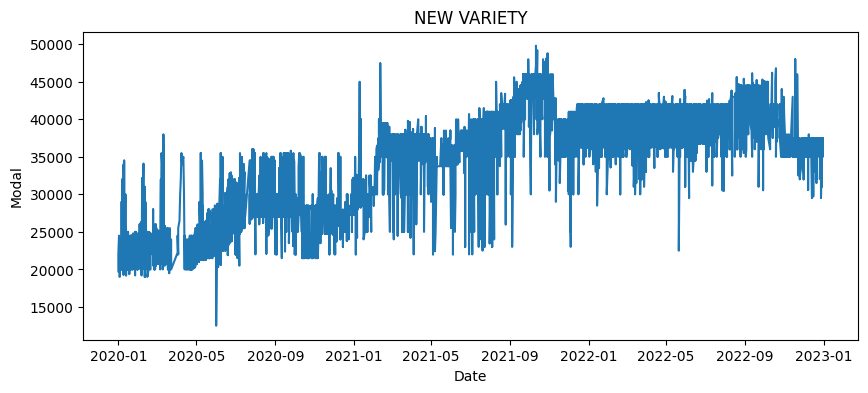

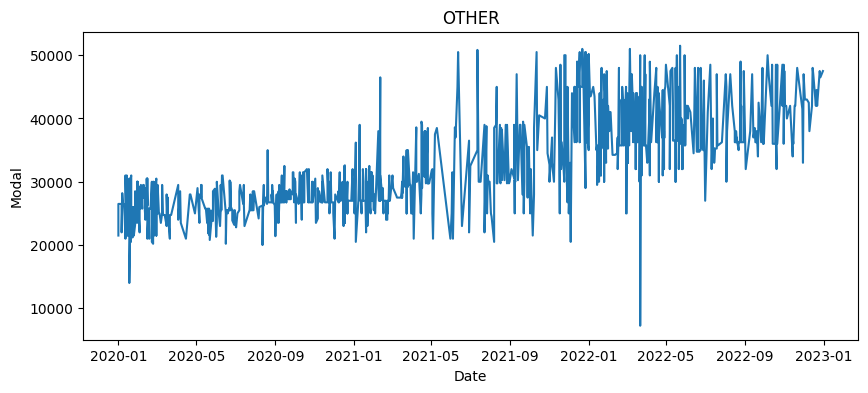

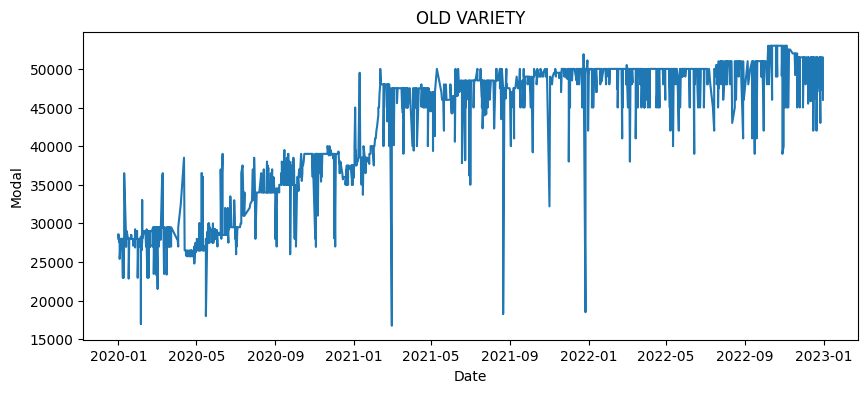

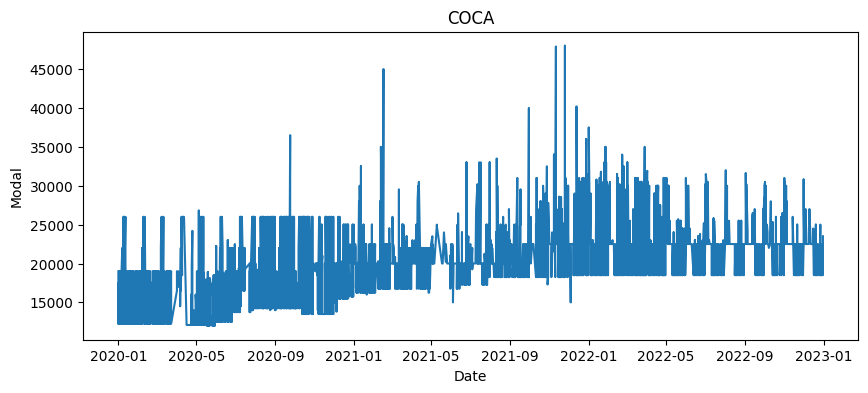

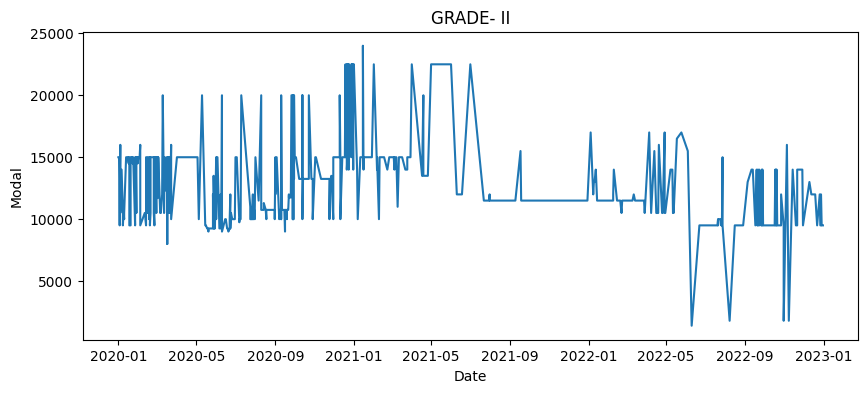

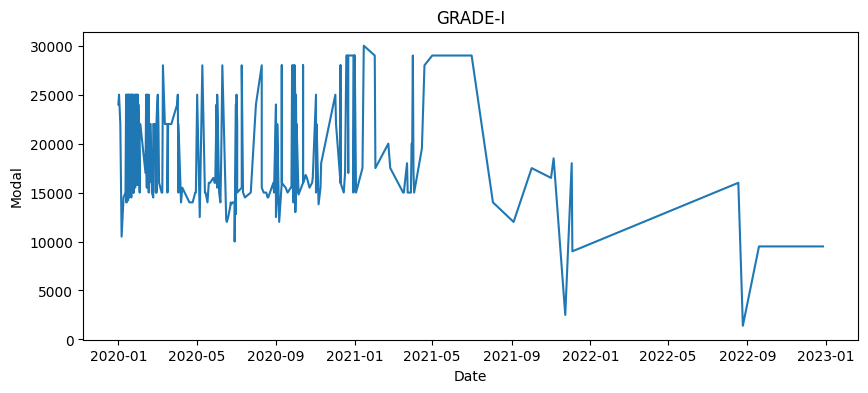

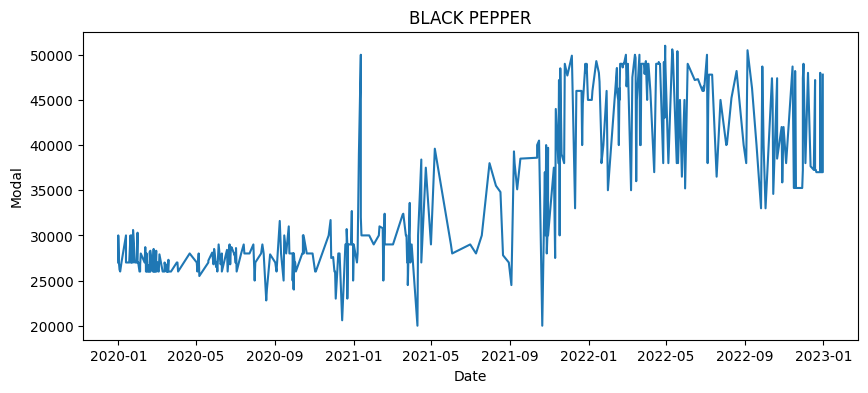

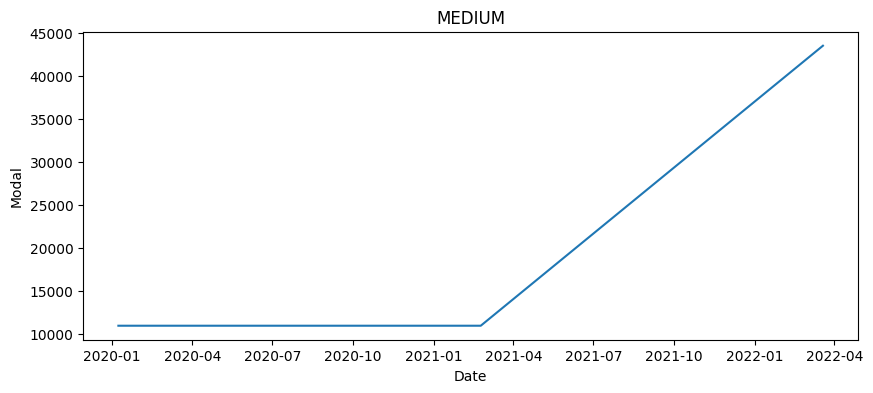

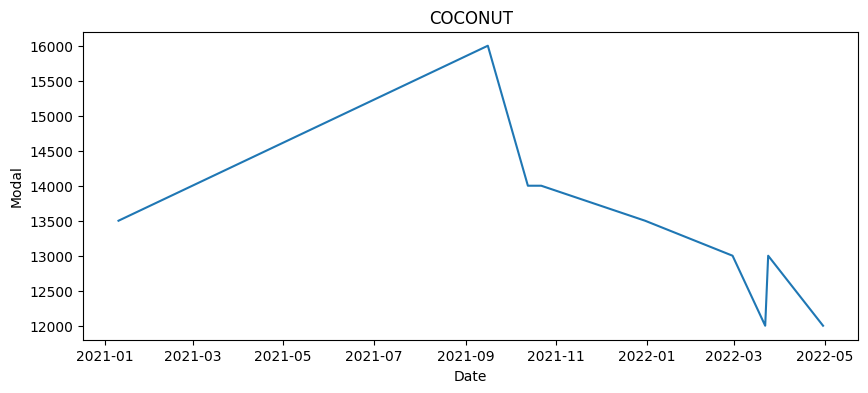

In [28]:
from matplotlib import pyplot as plt

varieties = list(df['Variety'].unique())
df2 = df
for variety in varieties:
    subset = df2[df2['Variety'] == variety]
    plt.figure(figsize=(10,4))
    plt.plot(subset['Date'],subset['Modal'])
    plt.title(variety)
    plt.xlabel('Date')
    plt.ylabel('Modal')
    plt.show()


#### Augmented Dickey-Fuller Test (ADF Test) to check stationarity

In [34]:
df2

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
3007,BELTHANGADI,2020-01-01,OTHER,AVERAGE,3.0,Quintal,21000.0,22000.0,21500.0,Dakshina Kannada
4754,MANGALURU,2020-01-01,OLD VARIETY,AVERAGE,95.0,Quintal,25000.0,29500.0,28000.0,Dakshina Kannada
4706,MANGALURU,2020-01-01,COCA,AVERAGE,100.0,Quintal,16000.0,21500.0,19000.0,Dakshina Kannada
...,...,...,...,...,...,...,...,...,...,...
147,BANTWALA,2022-12-31,COCA,AVERAGE,39.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
172,BANTWALA,2022-12-31,NEW VARIETY,AVERAGE,4.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada
2781,BELTHANGADI,2022-12-31,COCA,AVERAGE,50.0,Quintal,23000.0,24000.0,23500.0,Dakshina Kannada
2810,BELTHANGADI,2022-12-31,OLD VARIETY,AVERAGE,317.0,Quintal,43600.0,48000.0,46000.0,Dakshina Kannada


In [37]:
ignore_variety = ['MEDIUM','COCONUT']

from statsmodels.tsa.stattools import adfuller

for variety in varieties:
    if variety not in ignore_variety:
        subset = df2[df2['Variety'] == variety]
        time_series = subset['Modal']
        result = adfuller(time_series)
        p_value = result[1]
        print(f'p_value for variety {variety} is {p_value}')
        if p_value <= 0.05:
            print("The time series is likely stationary for ",variety)
        else:
            print("The time series is likely non-stationary for ",variety)
        print('------------------------------------------------------------')

p_value for variety NEW VARIETY is 0.28554489346777956
The time series is likely non-stationary for  NEW VARIETY
------------------------------------------------------------
p_value for variety OTHER is 0.7899388974543333
The time series is likely non-stationary for  OTHER
------------------------------------------------------------
p_value for variety OLD VARIETY is 0.6547134342403562
The time series is likely non-stationary for  OLD VARIETY
------------------------------------------------------------
p_value for variety COCA is 0.014238275229952826
The time series is likely stationary for  COCA
------------------------------------------------------------
p_value for variety GRADE- II is 0.010981134380208308
The time series is likely stationary for  GRADE- II
------------------------------------------------------------
p_value for variety GRADE-I is 0.0020699593729214664
The time series is likely stationary for  GRADE-I
------------------------------------------------------------
p_va